# Visualization with DeepLenstronomy

`deeplenstronomy` has a couple built-in visualization functions to help you inspect your simulated data. To see these functions in action, let's start by simulating a dataset.

In [1]:
import deeplenstronomy.deeplenstronomy as dl
from deeplenstronomy.visualize import view_image, view_image_rgb

In [2]:
dataset = dl.make_dataset('data/demo.yaml', store_sample=True, store_in_memory=False, verbose=True)

Entering main organization loop
Organizing CONFIGURATION_1
Organizing CONFIGURATION_2
Organizing CONFIGURATION_3
Organizing CONFIGURATION_4
Generating images for CONFIGURATION_1
	Progress: 100.0 %  ---  Elapsed Time: 0 H 0 M 5 S
Generating images for CONFIGURATION_2
	Progress: 100.0 %  ---  Elapsed Time: 0 H 0 M 5 S
Generating images for CONFIGURATION_3
	Progress: 100.0 %  ---  Elapsed Time: 0 H 0 M 4 S
Generating images for CONFIGURATION_4
	Progress: 100.0 %  ---  Elapsed Time: 0 H 0 M 26 S


## `view_image()`

The `view_image()` function is built on top of `matplotlib.pyplot.imshow()` and takes care of some formatting things for you. It is defined as follows:

In [3]:
help(view_image)

Help on function view_image in module deeplenstronomy.visualize:

view_image(image, stretch_func=<function no_stretch at 0x7f7f816f8e60>, **imshow_kwargs)
    Plot an image.
    
    :param image: a 2-dimensional array of pixel values
                  OR
                  a list-like object of 2-dimensional arrays of pixel values
    :param stretch_func: func, stretching function to apply to pixel values (e.g. np.log10)
    :param imshow_kwargs: keyword arguments to pass to matplotlib.pyplot.imshow



`view_image()` can be used to display a single image:

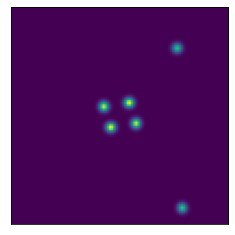

In [4]:
view_image(dataset.CONFIGURATION_4_images[0][0])

`view_image()` can be used to display an array of images, useful for displaying all the bands simultaneously:

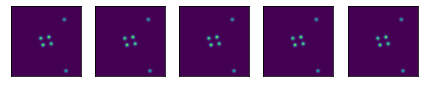

In [5]:
view_image(dataset.CONFIGURATION_4_images[0])

You can apply a stretching function to your images before plotting:

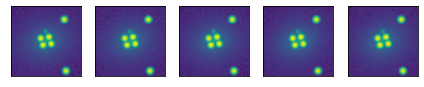

In [6]:
import numpy as np
view_image(dataset.CONFIGURATION_4_images[0], stretch_func=np.log10)

You can pass `matplotlib.pyplot.imshow()` keyword arguments directly to `view_image()`:

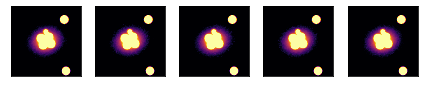

In [7]:
view_image(dataset.CONFIGURATION_4_images[0], stretch_func=np.log10, vmin=1, vmax=2, cmap='inferno')

_Note_: The stretching function is applied before passing keyword arguments to imshow. Therefore, in this example `vmin` is really $10^1$ and `vmax` is really $10^2$ if we are considering the unstreteched pisel values.

## `view_image_rgb()`

The `view_image_rgb()` function is built on top of `matplotlib.pyplot.imshow()` and `astropy.visualization.make_lupton_rgb()`. It is defined as follows:

In [8]:
help(view_image_rgb)

Help on function view_image_rgb in module deeplenstronomy.visualize:

view_image_rgb(images, Q=2.0, stretch=4.0, **imshow_kwargs)
    Merge images into a single RGB image. This function assumes the image array
    is ordered [g, r, i]
    
    :param images: a list of at least 3 2-dimensional arrays of pixel values
                   corresponding to different photometric bandpasses
    :param imshow_kwargs: keyword arguments to pass to matplotlib.pyplot.imshow



You can utilize this function by passing an array of images, ordered from bluest to reddest. This function struggles with noisy and low signal-to-noise images, but is a great check to make sure colors are appearing as expected.

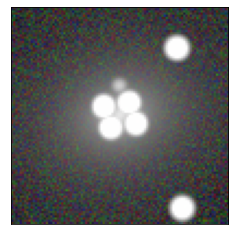

In [9]:
view_image_rgb(dataset.CONFIGURATION_4_images[0], Q=10, stretch=10)

You will often have to tweak the `Q` and `stretch` values when using this function. Again, you can also pass `matplotlib.pyplot.imshow()` keyword arguments to the function, but keywords like `cmap` are discouraged to allow the `make_lupton_rgb()` to control the colors displayed.